In [35]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV, cross_validate
from sklearn.metrics import r2_score as r2, mean_squared_error as mse


In [36]:
data = np.loadtxt("/Users/adithya/Desktop/Materials/Books/Data-science/ML_Ankur/Dataset/quadratic_raw_data.csv", delimiter=",")
x=data[:,0,None]
print(x.shape)

y=data[:,1,None]
print(y.shape)

(25, 1)
(25, 1)


Optimal hyperparameter: {'poly__degree': 3}


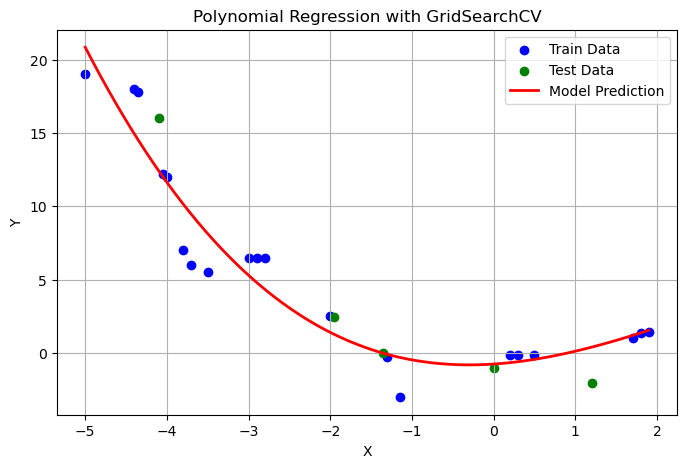

Mean Squared Error (MSE): 4.01
R² Score: 0.91


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

pipe = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

param_grid = {'poly__degree': np.arange(1, 6)}
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(x_train, y_train)

best_pipe = gs.best_estimator_


print('Optimal hyperparameter:', gs.best_params_)

y_pred = best_pipe.predict(x_test)

# Generate smooth x values across the full range
x_curve = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)

# Predict using the best model
y_curve = best_pipe.predict(x_curve)

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_test, y_test, color='green', label='Test Data')
plt.plot(x_curve, y_curve, color='red', linewidth=2, label='Model Prediction')  # Smooth curve
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression with GridSearchCV")
plt.legend()
plt.grid(True)
plt.show()

print("Mean Squared Error (MSE):", round(mse(y_test, y_pred),2))
print("R² Score:", round(r2(y_test, y_pred),2))


Optimal hyperparameter: {'model__alpha': 0.32, 'poly__degree': 3}


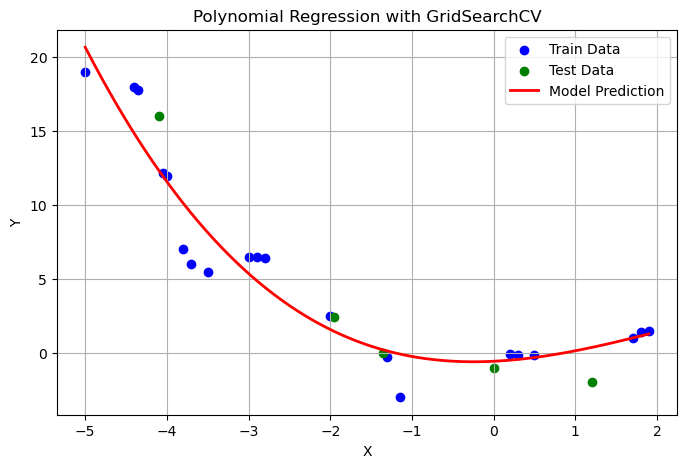

Mean Squared Error (MSE): 4.03
R² Score: 0.91


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

pipe = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)),
    ("scaler", StandardScaler()),
    ("model", Ridge())
])

param_grid = {'poly__degree': np.arange(1, 6),
             'model__alpha':np.linspace(0.01,1,100)}
gs = GridSearchCV(pipe, param_grid)
gs.fit(x_train, y_train)

best_pipe = gs.best_estimator_

print('Optimal hyperparameter:', gs.best_params_)

y_pred = best_pipe.predict(x_test)

# Generate smooth x values across the full range
x_curve = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)

# Predict using the best model
y_curve = best_pipe.predict(x_curve)

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_test, y_test, color='green', label='Test Data')
plt.plot(x_curve, y_curve, color='red', linewidth=2, label='Model Prediction')  # Smooth curve
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression with GridSearchCV")
plt.legend()
plt.grid(True)
plt.show()

print("Mean Squared Error (MSE):", round(mse(y_test, y_pred),2))
print("R² Score:", round(r2(y_test, y_pred),2))


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.331e-01, tolerance: 3.610e-02
  model = cd_fast.enet_coordinate_descent(


Optimal hyperparameter: {'model__alpha': 0.29000000000000004, 'poly__degree': 3}


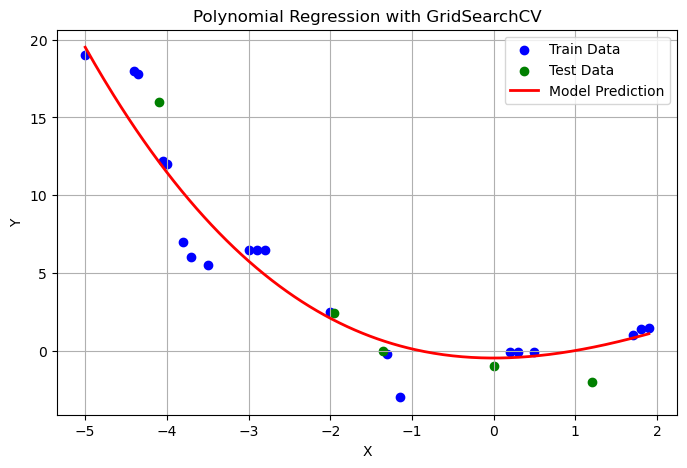

Mean Squared Error (MSE): 4.09
R² Score: 0.91


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

pipe = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)),
    ("scaler", StandardScaler()),
    ("model", Lasso(),)
])

param_grid = {'poly__degree': np.arange(1, 6),
             'model__alpha':np.linspace(0.01,1,100)}
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=3)
gs.fit(x_train, y_train)

best_pipe = gs.best_estimator_

print('Optimal hyperparameter:', gs.best_params_)

y_pred = best_pipe.predict(x_test)

# Generate smooth x values across the full range
x_curve = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)

# Predict using the best model
y_curve = best_pipe.predict(x_curve)

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_test, y_test, color='green', label='Test Data')
plt.plot(x_curve, y_curve, color='red', linewidth=2, label='Model Prediction')  # Smooth curve
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression with GridSearchCV")
plt.legend()
plt.grid(True)
plt.show()

print("Mean Squared Error (MSE):", round(mse(y_test, y_pred),2))
print("R² Score:", round(r2(y_test, y_pred),2))


{'poly__degree': 2}
0.92


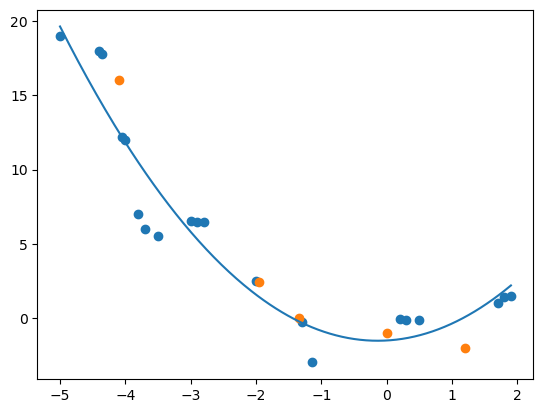

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1,test_size=0.2)

pipe=Pipeline([
    ("poly",PolynomialFeatures(include_bias=False)),
    ("model",LinearRegression())   
]
    
)
param_grid = {
   "poly__degree": np.arange(1,6), 
}

gs=GridSearchCV(pipe,param_grid,cv=3,scoring="neg_mean_squared_error")
gs.fit(x_train, y_train)
best_pipe=gs.best_estimator_
print(gs.best_params_)

y_pred=best_pipe.predict(x_test)
x_curve=np.linspace(x.min(), x.max(), 300).reshape(-1,1)
y_curve=best_pipe.predict(x_curve)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x_curve, y_curve)
print(round(r2(y_test, y_pred),2))

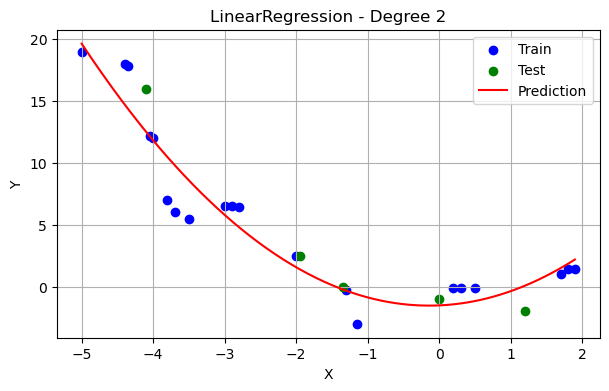

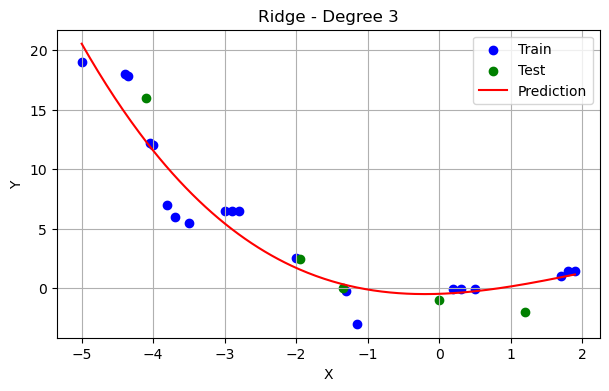

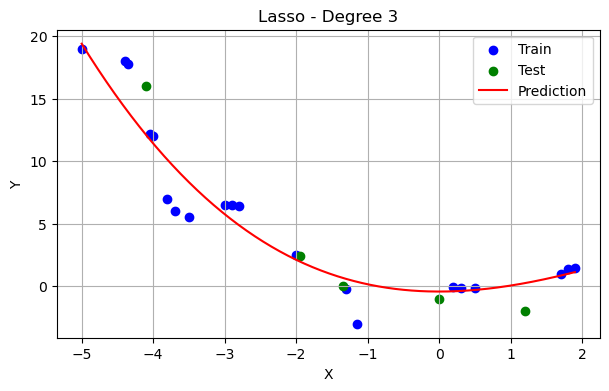


📊 LinearRegression Results:
Best Parameters: {'poly__degree': 2}
Test MSE: 3.56
Test R²: 0.92

📊 Ridge Results:
Best Parameters: {'model__alpha': 0.56, 'poly__degree': 3}
Test MSE: 4.03
Test R²: 0.91

📊 Lasso Results:
Best Parameters: {'model__alpha': 0.34, 'poly__degree': 3}
Test MSE: 4.23
Test R²: 0.9


In [41]:
# Models to compare
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(max_iter=10000)
}

# Hyperparameter grids
param_grids = {
    "LinearRegression": {'poly__degree': np.arange(1, 6)},
    "Ridge": {'poly__degree': np.arange(1, 6), 'model__alpha': np.linspace(0.01, 1, 10)},
    "Lasso": {'poly__degree': np.arange(1, 6), 'model__alpha': np.linspace(0.01, 1, 10)}
}

# Store results
results = {}

for name, model in models.items():
    pipe = Pipeline([
        ("poly", PolynomialFeatures(include_bias=False)),
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    gs = GridSearchCV(pipe, param_grids[name], scoring='neg_mean_squared_error', cv=3)
    gs.fit(x_train, y_train)

    best_pipe = gs.best_estimator_
    y_pred = best_pipe.predict(x_test)

    results[name] = {
        'best_params': gs.best_params_,
        'mse': mse(y_test, y_pred),
        'r2': r2(y_test, y_pred),
        'model': best_pipe
    }

    # Optional: Plot each model
    x_curve = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
    y_curve = best_pipe.predict(x_curve)

    plt.figure(figsize=(7, 4))
    plt.scatter(x_train, y_train, color='blue', label='Train')
    plt.scatter(x_test, y_test, color='green', label='Test')
    plt.plot(x_curve, y_curve, color='red', label='Prediction')
    plt.title(f"{name} - Degree {gs.best_params_['poly__degree']}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.show()

# Print summary
for name, res in results.items():
    print(f"\n📊 {name} Results:")
    print("Best Parameters:", res['best_params'])
    print("Test MSE:", round(res['mse'], 2))
    print("Test R²:", round(res['r2'], 2))


In [42]:
noise= np.loadtxt("/Users/adithya/Desktop/Materials/Books/Data-science/ML_Ankur/Dataset/noisy_flow_signal.csv", delimiter=",")
noise

array([63.84048157, 66.66222122, 69.99228469, 70.60886408, 67.45042732,
       67.03414459, 65.2347366 , 69.84087226, 67.73274352, 63.39879142,
       60.4455196 , 65.02661194, 67.3205285 , 63.99431761, 71.29223319,
       67.47481833, 68.10390821, 67.00162586, 70.790817  , 71.09919522,
       75.05925801, 67.80218173, 72.0379048 , 71.85433353, 66.46254348,
       72.82049677, 69.93702079, 74.96372419, 76.00031213, 73.86167191,
       75.46842712, 72.24823459, 70.28193658, 75.31164929, 68.39258873,
       71.09945711, 71.95603324, 67.33257952, 70.55630013, 70.26488546,
       64.89757699, 68.50806733, 70.16048274, 67.84147805, 62.06352209,
       64.98273001, 70.07185973, 68.09882476, 68.01949168, 72.63674991,
       70.702075  , 69.61824355, 76.96089759, 70.42091516, 68.47821202,
       74.42632723, 76.90353658, 73.84036565, 76.28111089, 70.94248   ,
       74.68402642, 71.99142896, 72.65598768, 66.62920696, 73.07162648,
       70.31642562, 67.53782533, 74.21752822, 77.39456676, 72.17

In [43]:

x1=data[:,0,None]
print(x.shape)

y1=data[:,1,None]
print(y.shape)

(25, 1)
(25, 1)


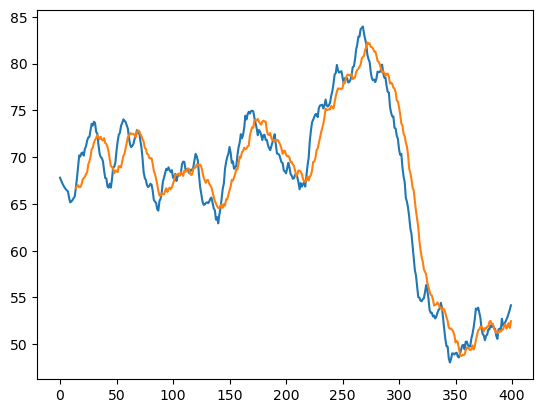

In [44]:
ws=15

from scipy.signal import savgol_filter as sg
sgf=sg(noise,window_length=15,polyorder=2)
plt.plot(sgf)

sma=pd.DataFrame(noise).rolling(ws).mean().values
plt.plot(sma)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e-01, tolerance: 4.128e-02
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('Scaler', StandardScaler()), ('model', Lasso(alpha=0.28))])
{'model__alpha': 0.28, 'poly__degree': 2}


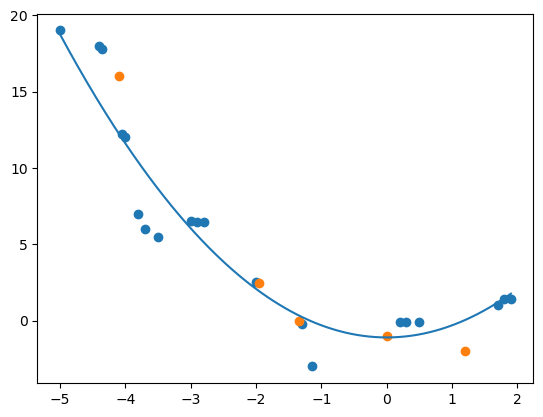

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

pipe=Pipeline([
    ("poly",PolynomialFeatures(include_bias=False)),
    ("Scaler",StandardScaler()),
    ("model",Lasso(max_iter=1000))
    
]
)
              
param ={
    "poly__degree":np.arange(1,6),
    "model__alpha":np.linspace(0.01,1,100)
}

gs=GridSearchCV(pipe,param)

gs.fit(x_train, y_train)
print(gs.best_estimator_)
print(gs.best_params_)

best_pipe = gs.best_estimator_
y_pred = best_pipe.predict(x_test)


plt.scatter(x_train, y_train)
plt.scatter (x_test, y_test)

xf = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
yf = best_pipe.predict(xf)
plt.plot(xf,yf)